<h1><center>Customer Churn Prediction</center></h1>
<h3><center>Training and Testing</center></h3>



In this notebook, I made data 2 ML based-experiments to prove that the engineered features achieve better accuracy. In addition to reporting different acurracy metrics

<div id="toc_container">
<p class="toc_title">Table Of Contents</p>
<ul class="toc_list">
  <li><a href="#ex_1">1. 1st Experiment </a></li>

<li><a href="#ex_2">2. 2nd Experiment</a></li> 

<li><a href="#results">3. Result Analysis </a></li> 
    
<li><a href="#deep_learning">3. Deep Learning (Optional)</a></li> 

<li><a href="#submission">4. Submission</a></li> 
  <ul>
    <li><a href="#kaggle">4.1 Kaggle Results</a></li>
  <ul>

</div>


In [1]:
# importing the needed Packages
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix # required Accuracy metirics  mainly(Accuracy score,  F1 -secore)
from utils.preprocessing import feature_engineering, remove_outliers,encoder ,features_selection ,features_scaling ,KNN_oversample
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv('datasets/train_set.csv')
test_df = pd.read_csv('datasets/test_set.csv')

In this case, it's better to use **Machine Learning** model than **Deep Learning** because our dataset isn't big.

That why I went for data engineering techinques to introduce better and meaningful featuers




Too many Classifiers can be used in this case, but I chose ,**Ensemble Learning**, Random forest classifier

Define the train and test pipelines

In [3]:
def train_pipeline(df , with_features):
    result  = df.copy()
    result,idx_removed = remove_outliers(result ,['minutes' , 'charge'], 'no')
    result = feature_engineering(result ,with_features ,with_features ,with_features,with_features)
    result =  features_scaling(result)
    result,cols_encoded = encoder(result)
    result = features_selection(result, with_features)
    X, y = KNN_oversample(result)
    rf_clf = RandomForestClassifier(random_state=6 )
    rf_clf.fit(X, y)
    return rf_clf , X,y

In [4]:
def test_pipeline(df , with_features , with_target):
    result  = df.copy()
    result = feature_engineering(result ,with_features ,with_features ,with_features,with_features)
    result =  features_scaling(result)
    result,cols_encoded = encoder(result, with_target)
    result = features_selection(result, with_features)
    if with_target:
        X_val,y_val = result.drop(['churn_encoded'] , axis =1) , result['churn_encoded']
        return X_val,y_val
    else:
        return result

In the testing phase, We can't perform outliers removal and oversampling

## 1st Expirment  <a class="anchor" id="ex_1"></a>

In this Experiment, I will train and test the Random Forest Classifier on the dataset **with the engineered featuers**

In [15]:
with_features_engineered = True
with_target = True

In [16]:
rf_clf1 , X_exp1,y_exp1 = train_pipeline(train_df , with_features_engineered)

When chrun =  no  the  number of outilers in  total_night_minutes :  25
When chrun =  no  the  number of outilers in  total_day_minutes :  16
When chrun =  no  the  number of outilers in  total_eve_minutes :  23
percentage of outliers: 2.3110785033015406


When chrun =  no  the  number of outilers in  total_night_charge :  2
When chrun =  no  the  number of outilers in  total_day_charge :  1
When chrun =  no  the  number of outilers in  total_eve_charge :  1
percentage of outliers: 0.1502065339842283


normalized cols:  ['number_customer_service_calls', 'number_vmail_messages']
standarized cols:  ['account_length' 'intl_charge_per_minutes' 'total_charge'
 'total_day_calls' 'total_day_charge' 'total_day_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_eve_minutes'
 'total_intl_calls' 'total_intl_charge' 'total_intl_minutes'
 'total_minutes' 'total_night_calls' 'total_night_charge'
 'total_night_minutes' 'voice_international_subscriber_encoded']
Tatget classes counts after oversampl

C:\Users\RC\Desktop\Halan\utils\preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice_international_subscriber_encoded'][voice_internationa_plan.index] =1


In [17]:
X_val_exp1,y_val_exp1 = test_pipeline(test_df , with_features_engineered, with_target) 

normalized cols:  ['number_customer_service_calls', 'number_vmail_messages']
standarized cols:  ['account_length' 'intl_charge_per_minutes' 'total_charge'
 'total_day_calls' 'total_day_charge' 'total_day_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_eve_minutes'
 'total_intl_calls' 'total_intl_charge' 'total_intl_minutes'
 'total_minutes' 'total_night_calls' 'total_night_charge'
 'total_night_minutes' 'voice_international_subscriber_encoded']


C:\Users\RC\Desktop\Halan\utils\preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice_international_subscriber_encoded'][voice_internationa_plan.index] =1


In [18]:
exp1_preds= rf_clf1.predict(X_val_exp1)

## 2nd Expirment  <a class="anchor" id="ex_2"></a>

In this Experiment, I will train and test the Random Forest Classifier on the dataset **without the engineered featurese**

In [19]:
with_features_engineered = False

In [20]:
rf_clf2 , X_exp2,y_exp2 = train_pipeline(train_df , with_features_engineered)

When chrun =  no  the  number of outilers in  total_night_minutes :  25
When chrun =  no  the  number of outilers in  total_day_minutes :  16
When chrun =  no  the  number of outilers in  total_eve_minutes :  23
percentage of outliers: 2.3110785033015406


When chrun =  no  the  number of outilers in  total_night_charge :  2
When chrun =  no  the  number of outilers in  total_day_charge :  1
When chrun =  no  the  number of outilers in  total_eve_charge :  1
percentage of outliers: 0.1502065339842283


normalized cols:  ['number_customer_service_calls', 'number_vmail_messages']
standarized cols:  ['account_length' 'total_day_calls' 'total_day_charge' 'total_day_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_eve_minutes'
 'total_intl_calls' 'total_intl_charge' 'total_intl_minutes'
 'total_night_calls' 'total_night_charge' 'total_night_minutes']
Tatget classes counts after oversampling:
 0    2659
1    2659
Name: churn_encoded, dtype: int64


In [21]:
X_val_exp2,y_val_exp2 = test_pipeline(test_df , with_features_engineered , with_target)

normalized cols:  ['number_customer_service_calls', 'number_vmail_messages']
standarized cols:  ['account_length' 'total_day_calls' 'total_day_charge' 'total_day_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_eve_minutes'
 'total_intl_calls' 'total_intl_charge' 'total_intl_minutes'
 'total_night_calls' 'total_night_charge' 'total_night_minutes']


In [22]:
exp2_preds= rf_clf2.predict(X_val_exp2)

## Result Analysis <a class="anchor" id="results"></a>

In [23]:
def reporting(exp_preds, y_val):
    print(classification_report(exp_preds, y_val))
    title = "Experiment acuracy is: " + str(accuracy_score(exp_preds, y_val)* 100)
    
    C_M = confusion_matrix(exp_preds, y_val)
    plt.rc('figure', figsize=[5,5])
    plt.matshow(C_M,cmap="Blues")
    plt.title(title)
    for i in range(0,C_M.shape[0]):
        for j in range(0,C_M.shape[1]):
            plt.annotate(C_M[i,j],(j,i))
    

Expirment 1 Results

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       933
           1       0.86      0.91      0.88       130

    accuracy                           0.97      1063
   macro avg       0.92      0.94      0.93      1063
weighted avg       0.97      0.97      0.97      1063



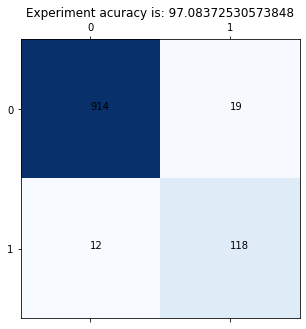

In [24]:
reporting(exp1_preds, y_val_exp1)

However expirment 2 Results

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       909
           1       0.80      0.71      0.76       154

    accuracy                           0.93      1063
   macro avg       0.88      0.84      0.86      1063
weighted avg       0.93      0.93      0.93      1063



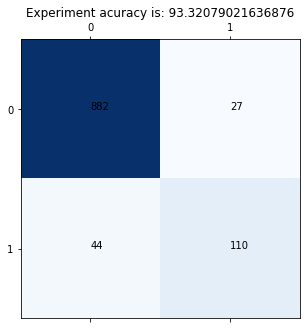

In [25]:
reporting(exp2_preds, y_val_exp2)

Clearly, We can see that the model trained on the engineered featuers could achieve about 3-4% higher in the total accuracy 

and could classify better on the both classes, That means model in experiment 1 is a little less imbaised than the one in expirment 2

Moreover, model in experiment 1 got higher f1- score for both classes

In [26]:
perm = PermutationImportance(rf_clf1, random_state=1).fit(X_val_exp1, y_val_exp1)
eli5.show_weights(perm, feature_names = X_val_exp1.columns.tolist())


Weight,Feature
0.1059 ± 0.0037,total_charge
0.0480 ± 0.0094,number_customer_service_calls
0.0442 ± 0.0041,international_plan_encoded
0.0252 ± 0.0087,voice_mail_plan_encoded
0.0216 ± 0.0053,total_intl_calls
0.0088 ± 0.0026,total_intl_minutes
0.0087 ± 0.0018,total_intl_charge
0.0049 ± 0.0044,number_vmail_messages
0.0036 ± 0.0008,voice_international_subscriber_encoded
0.0028 ± 0.0053,state_0


In [27]:
perm = PermutationImportance(rf_clf2, random_state=1).fit(X_val_exp2, y_val_exp2)
eli5.show_weights(perm, feature_names = X_val_exp2.columns.tolist())

Weight,Feature
0.0905 ± 0.0183,total_day_charge
0.0467 ± 0.0100,number_customer_service_calls
0.0346 ± 0.0034,international_plan_encoded
0.0211 ± 0.0131,total_eve_charge
0.0194 ± 0.0097,voice_mail_plan_encoded
0.0162 ± 0.0055,total_intl_calls
0.0141 ± 0.0075,total_intl_charge
0.0083 ± 0.0091,total_night_charge
0.0051 ± 0.0055,state_2
0.0045 ± 0.0032,state_0


We could also see that the engineered features got higher weights in the model

## Deep Learning <a class="anchor" id="deep_learning"></a>

Giving a try to test a Neural Network.

Altough Deep Learning is more intelligent than Machine Learining, it needs huge dataset to be able to perform better than ML 

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [29]:
early_stopping = callbacks.EarlyStopping(patience = 5 ,min_delta = 0.001, restore_best_weights =True )
input_shape = [X_exp1.shape[1]]

Epoch 1/50
84/84 [==============================] - 1s 4ms/step - loss: 0.6451 - accuracy: 0.6264 - val_loss: 0.5215 - val_accuracy: 0.7620
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7888 - val_loss: 0.4184 - val_accuracy: 0.8166
Epoch 3/50
84/84 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8215 - val_loss: 0.3843 - val_accuracy: 0.8278
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8413 - val_loss: 0.3710 - val_accuracy: 0.8250
Epoch 5/50
84/84 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8528 - val_loss: 0.3374 - val_accuracy: 0.8523
Epoch 6/50
84/84 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8603 - val_loss: 0.3168 - val_accuracy: 0.8664
Epoch 7/50
84/84 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8672 - val_loss: 0.3138 - val_accuracy: 0.8664
Epoch 8/50
84/84 [==

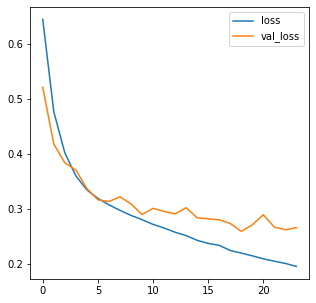

In [30]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=input_shape),
    layers.Dense(16, activation='relu'),    
    layers.Dense(1 , activation='sigmoid' )
    
])
model.compile(
    optimizer='adam',
   loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_exp1, y_exp1,
    validation_data=(X_val_exp1, y_val_exp1),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping] # to avoid overfitting
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [31]:
prdsss = model.predict(X_val_exp1)

In [32]:
prdsss = [1 * (x[0]>=0.5) for x in prdsss]

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       902
           1       0.69      0.58      0.63       161

    accuracy                           0.90      1063
   macro avg       0.81      0.77      0.79      1063
weighted avg       0.89      0.90      0.89      1063



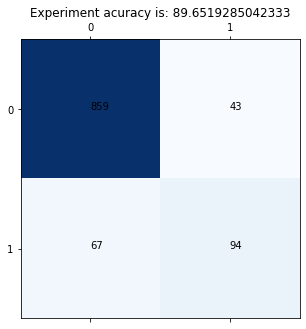

In [33]:
reporting(prdsss, y_val_exp1)

## Submission <a class="anchor" id="submission"></a>

Based on Expirement 1, We can build a new Random forest classifier on the whole exist dataset (without splitting)

Then follow kaggle instructions to submit it

In [34]:
total_train =  pd.read_csv('datasets/train.csv')
total_test= pd.read_csv('datasets/test.csv')

In [35]:
with_features_engineered = True
with_target = False

In [36]:
RF,X,y = train_pipeline(total_train , with_features_engineered)

When chrun =  no  the  number of outilers in  total_night_minutes :  32
When chrun =  no  the  number of outilers in  total_day_minutes :  17
When chrun =  no  the  number of outilers in  total_eve_minutes :  32
percentage of outliers: 2.190580503833516


When chrun =  no  the  number of outilers in  total_night_charge :  4
When chrun =  no  the  number of outilers in  total_day_charge :  0
When chrun =  no  the  number of outilers in  total_eve_charge :  5
percentage of outliers: 0.251959686450168


normalized cols:  ['number_customer_service_calls', 'number_vmail_messages']
standarized cols:  ['account_length' 'intl_charge_per_minutes' 'total_charge'
 'total_day_calls' 'total_day_charge' 'total_day_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_eve_minutes'
 'total_intl_calls' 'total_intl_charge' 'total_intl_minutes'
 'total_minutes' 'total_night_calls' 'total_night_charge'
 'total_night_minutes' 'voice_international_subscriber_encoded']
Tatget classes counts after oversamplin

C:\Users\RC\Desktop\Halan\utils\preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice_international_subscriber_encoded'][voice_internationa_plan.index] =1


In [37]:
ids = total_test['id']
total_test.drop('id' , axis=1 ,inplace =True)

In [38]:
X_val= test_pipeline(total_test , with_features_engineered, with_target) 

normalized cols:  ['number_customer_service_calls', 'number_vmail_messages']
standarized cols:  ['account_length' 'intl_charge_per_minutes' 'total_charge'
 'total_day_calls' 'total_day_charge' 'total_day_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_eve_minutes'
 'total_intl_calls' 'total_intl_charge' 'total_intl_minutes'
 'total_minutes' 'total_night_calls' 'total_night_charge'
 'total_night_minutes' 'voice_international_subscriber_encoded']


C:\Users\RC\Desktop\Halan\utils\preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice_international_subscriber_encoded'][voice_internationa_plan.index] =1


In [39]:
predictions= RF.predict(X_val)

In [40]:
submision  = pd.DataFrame(data = {'id' : [] , 'churn' : [] }) 
submision['id'] =ids
submision['churn'] =predictions
submision['churn'] = submision['churn'].map({0:'no' , 1:'yes'})

In [41]:
submision.to_csv('datasets/submission.csv' , index=False)

In [42]:
submision['churn'].value_counts()

no     652
yes     98
Name: churn, dtype: int64

## Kaggle Results  <a class="anchor" id="kaggle"></a>

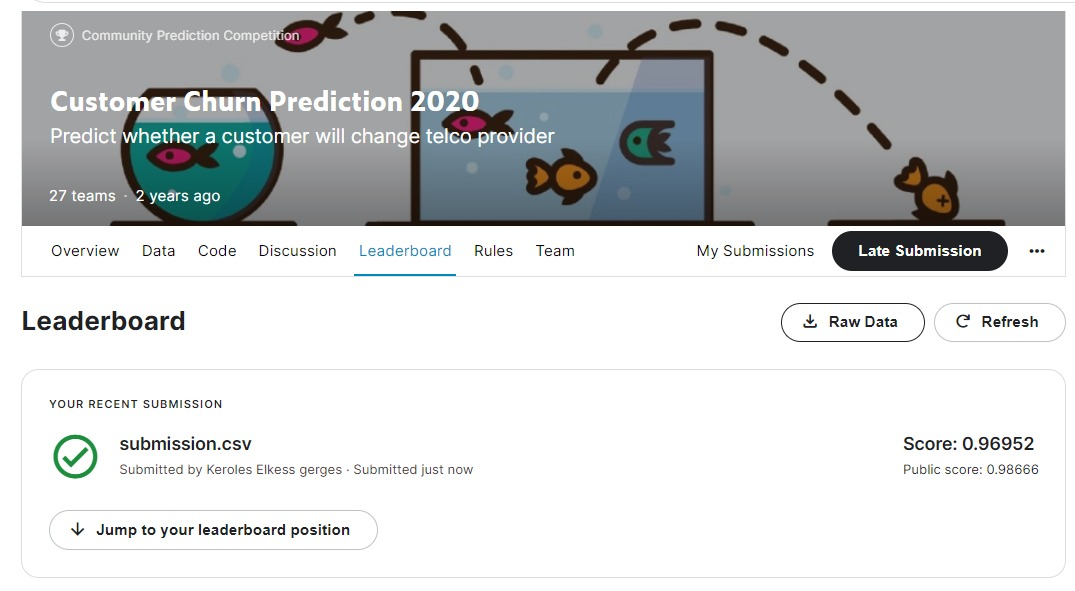

In [1]:
from IPython import display
display.Image('material/kaggle results.jpeg')